In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Как можно заметить, плотность совпадает с тем, что есть в википедии о хи-квадрат. df обозначает количество степеней свободы.

При увеличении количества степеней свободы видно, что и гистограмма, и плотность становятся похожими на нормальное распределение.

https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D1%85%D0%B8-%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82

Text(0.5, 0, 'x')

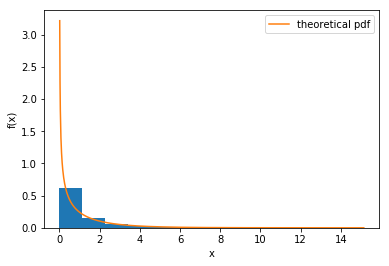

In [2]:
df = 1
chi = stats.chi2(df)
sample = chi.rvs(1000)

# density - то же самое, что и normed - только для python3
plt.hist(sample, density=True)

x = np.linspace(chi.ppf(0), chi.ppf(0.9999), 1000)
pdf = chi.pdf(x)
plt.plot(x, pdf, label='theoretical pdf')
plt.legend()
plt.ylabel('f(x)')
plt.xlabel('x')

Формула мат ожидания из википедии(k = df):
$$ \mu = k $$
Формула дисперсии:
$$ D = 2*k $$

## n = 5

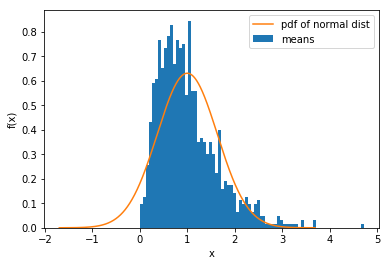

In [3]:
n = 5
# 1000 выборок объёма 5
sample_n5 = chi.rvs(size=[1000, n])
# средние от каждой маленькой выборки
means_n5 = np.mean(sample_n5, axis=1)

# гистограмма
plt.hist(means_n5, density=True, label='means', bins=75)
plt.ylabel('f(x)')
plt.xlabel('x')

# мат ожидание и дисперсия по формулам выше
mu = df
sigma = np.math.sqrt(2 * df / n)

# делаем нормальное распределение
norm_rv = stats.norm(mu, sigma)

# рисуем плотность этого распределения
x = np.linspace(norm_rv.ppf(0.00001), norm_rv.ppf(1 - 0.00001), 1000)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='pdf of normal dist')
plt.legend()

## n = 10

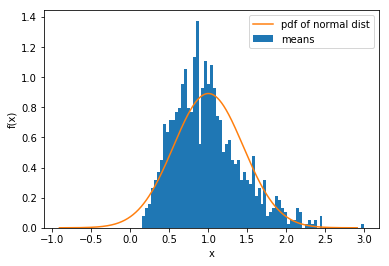

In [4]:
n = 10
# 1000 выборок объёма 10
sample_n10 = chi.rvs(size=[1000, n])
# средние от каждой маленькой выборки
means_n10 = np.mean(sample_n10, axis=1)

# гистограмма
plt.hist(means_n10, density=True, label='means', bins=75)
plt.ylabel('f(x)')
plt.xlabel('x')

# мат ожидание и дисперсия по формулам выше
mu = df
sigma = np.math.sqrt(2 * df / n)

# делаем нормальное распределение
norm_rv = stats.norm(mu, sigma)

# рисуем плотность этого распределения
x = np.linspace(norm_rv.ppf(0.00001), norm_rv.ppf(1 - 0.00001), 1000)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='pdf of normal dist')
plt.legend()

## n = 1000

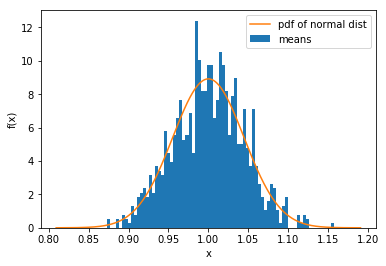

In [5]:
n = 1000
# 1000 выборок объёма 1000
sample_n1000 = chi.rvs(size=[1000, n])
# средние от каждой маленькой выборки
means_n1000 = np.mean(sample_n1000, axis=1)

# гистограмма
plt.hist(means_n1000, density=True, label='means', bins=75)
plt.ylabel('f(x)')
plt.xlabel('x')

# мат ожидание и дисперсия по формулам выше
mu = df
sigma = np.math.sqrt(2 * df / n)

# делаем нормальное распределение
norm_rv = stats.norm(mu, sigma)

# рисуем плотность этого распределения
x = np.linspace(norm_rv.ppf(0.00001), norm_rv.ppf(1 - 0.00001), 1000)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='pdf of normal dist')
plt.legend()

# Выводы
df специально взято небольшим, так как при большом количестве степеней свободы хи квадрат уже будет выглядеть как нормальное распределение и по гистограммам ничего конкретного нельзя будет сказать.

Видно, что при увеличении количества данных(увеличении элементов в подмассивах с 5 до 1000), гистограмма хи квадрат становится не свёрнутой в левую сторону, а симметричной и более-менее описывается графиком плотности нормального распределения(Центральная предельная теорема).

P.S. df = 1 не очень хорошо масштабируется на первой картинке, но именно на ней очень заметны различия между последующими гистограммами. Если взять df больше, то первая картинка будет выглядеть намного лучше, но зато остальные будут всё более и более похожими с увеличением df.